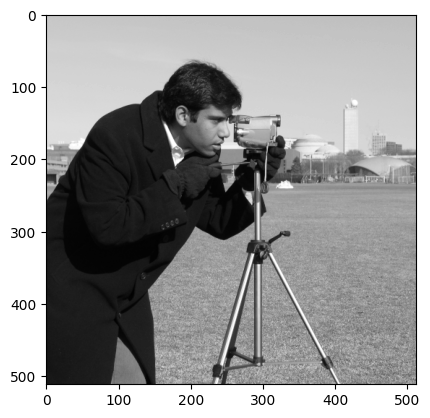

In [2]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
img=skimage.data.camera()
X=np.array(img)
plt.imshow(X, cmap="gray")





This is the original image<br>
Next we're plotting the singular values

(512, 512)


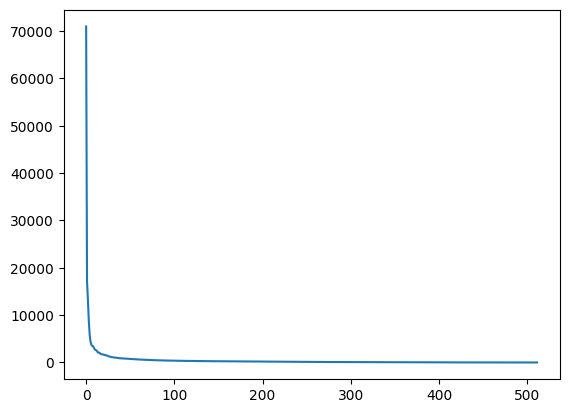

In [3]:
print(X.shape)
#print(img.head())

U, s, VT = np.linalg.svd(X, full_matrices=False)

plt.plot(s)


It's evident that the very first singular values are very high, while all the others are much lower in comparison.<br>
This means that we should need only a low number of dyad to have a good approximation of the image.

(512,)
(512, 512)


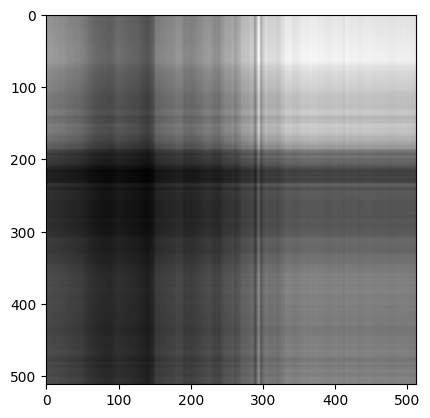

In [4]:
print(s.shape)


i=0
Ai=U[:,i:i+1]@VT[i:i+1,:]
Ai*=s[0]
print(Ai.shape)
plt.imshow(np.reshape(Ai, (512, 512)), cmap="gray")



(512, 512)


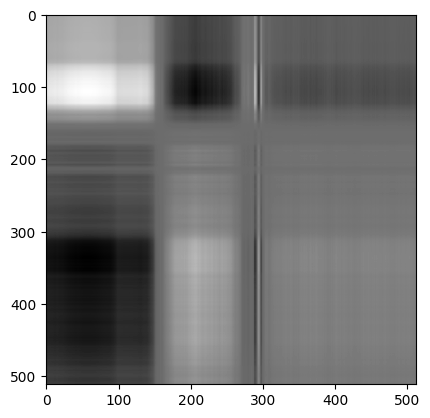

In [9]:
i=1

Ai=U[:,i:i+1]@VT[i:i+1,:]
Ai*=s[0]
print(Ai.shape)
plt.imshow(np.reshape(Ai, (512, 512)), cmap="gray")



Text(0.5, 1.0, 'k=511; Error=2.0042467387814476e-10')

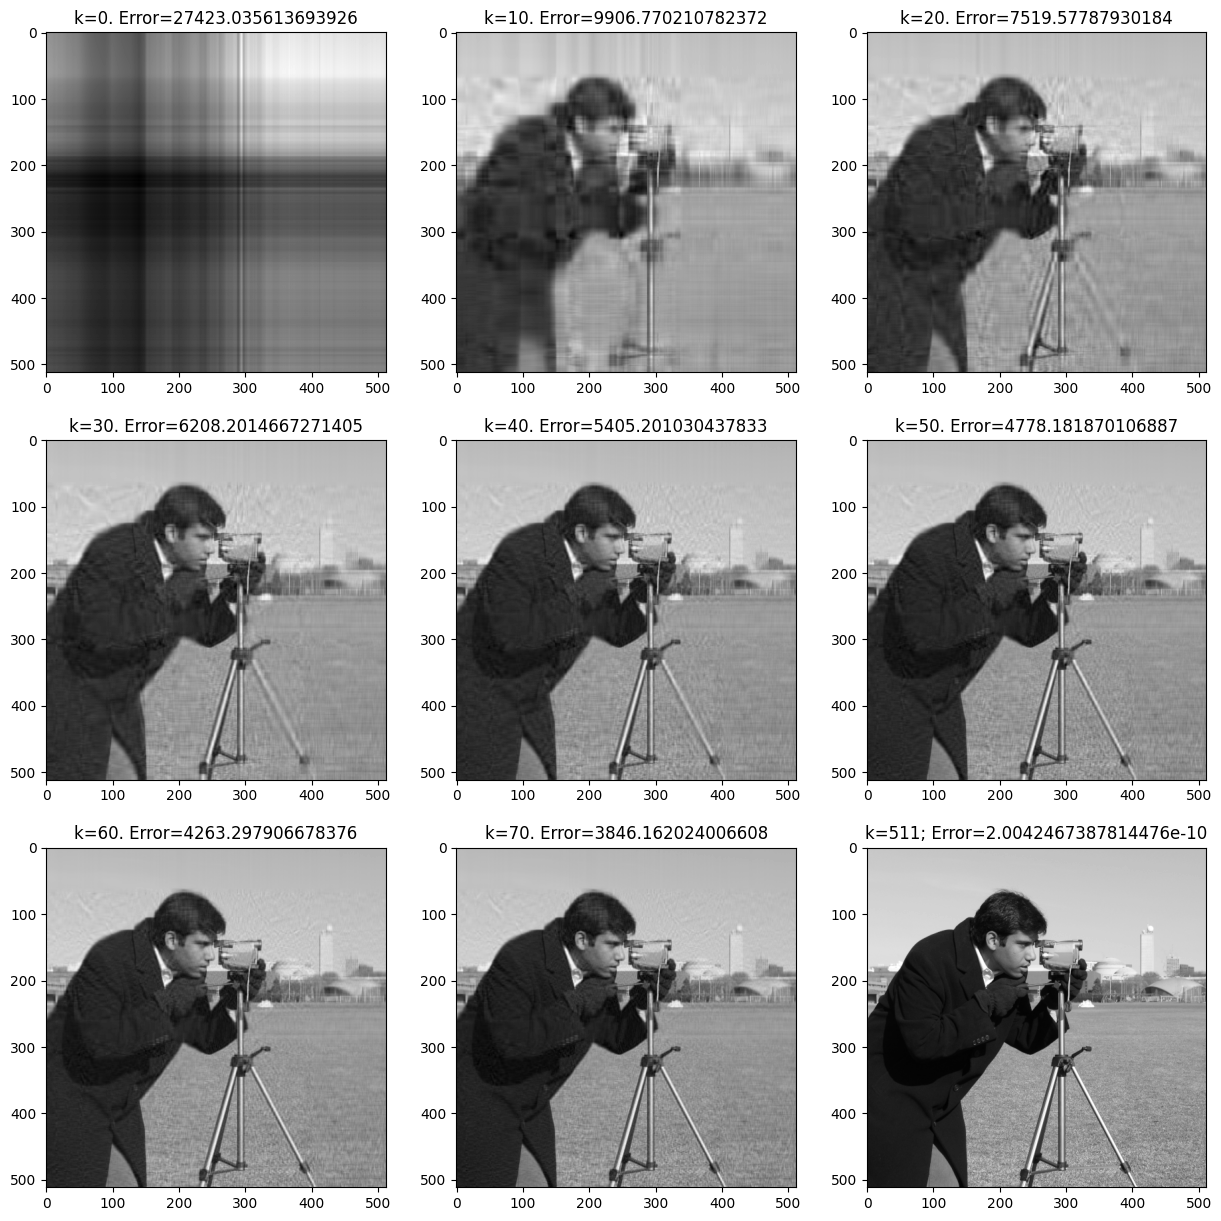

In [6]:
k=512
sum=0
E=np.zeros((512,))
Ai=np.zeros((512,512))
fig, ax= plt.subplots(3,3, figsize=(15,15))
pi=0
pj=0
for i in range(k):
    Ai+=(U[:,i:i+1]@VT[i:i+1,:])*s[i]
    E[i]=np.linalg.norm(X-Ai)
    if(i%10==0 and i<80):
        ax[pi][pj].imshow(np.reshape(Ai, (512, 512)), cmap="gray")
        ax[pi][pj].set_title(f"k={i}. Error={E[i]}")
        pj+=1
        if(pj==3):
            pj=0
            pi+=1
ax[2][2].imshow(np.reshape(Ai, (512, 512)), cmap="gray")
ax[2][2].set_title(f"k={i}; Error={E[i]}")


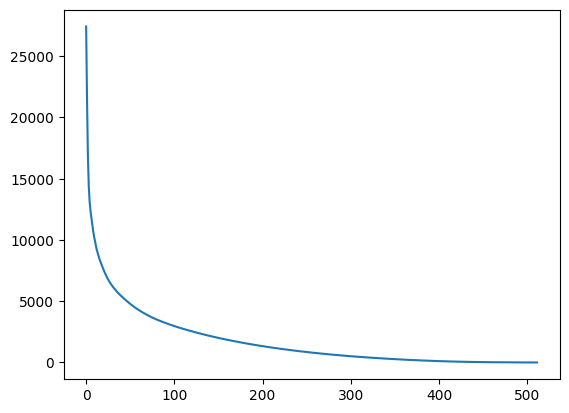

In [7]:
plt.plot(E)